In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
features=pd.read_csv('features.csv')
features_test=pd.read_csv('taxi_weather_data.csv')

In [67]:
features.columns

Index(['Unnamed: 0', 'pickup_datetime', 'pickup_latitude', 'pickup_longitude',
       'dropoff_latitude', 'dropoff_longitude', 'travel_time', 'date_of_year',
       'year', 'mo', 'da', 'temp', 'visib', 'wdsp', 'gust', 'max', 'min',
       'prcp', 'sndp', 'fog', 'rain_drizzle', 'snow_ice_pellets', 'hail',
       'thunder', 'distance_in_km', 'Pickup Geohash', 'Dropoff Geohash',
       'day_of_week', 'weekday', 'day_binned', 'day_hour', 'time_binned',
       'day_number', 'day_cosine', 'day_sine', 'time_cosine', 'time_sine'],
      dtype='object')

In [71]:
features_test.columns

Index(['Unnamed: 0', 'pickup_datetime', 'pickup_latitude', 'pickup_longitude',
       'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'day_hour',
       'distance_in_km', 'day_of_week', 'weekday', 'day_binned', 'time_binned',
       'day_number', 'day_cosine', 'day_sine', 'time_cosine', 'time_sine',
       'temp', 'visib', 'wdsp', 'gust', 'max', 'min', 'prcp', 'sndp', 'fog',
       'rain_drizzle', 'snow_ice_pellets', 'hail', 'thunder'],
      dtype='object')

### Look at travel time given month

In [87]:
month=features['mo']
travel_time=features['travel_time']
avg_per_month=features.groupby('mo').mean()['travel_time']

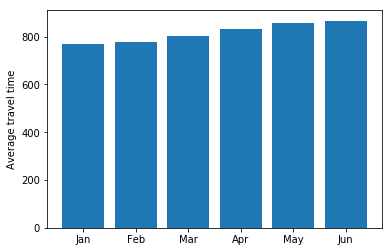

In [30]:
plt.bar(range(1,7),avg_per_month.values)
plt.bar(range(1,7),
plt.xticks(range(1,7),('Jan','Feb','Mar','Apr','May','Jun'))
plt.ylabel('Average travel time')
plt.show()

In [26]:
avg_per_day=features.groupby('day_of_week').mean()['travel_time']

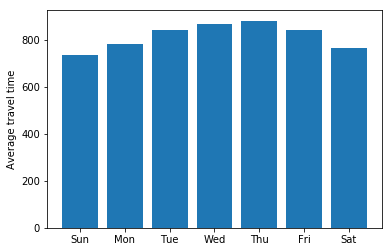

In [31]:
plt.bar(range(1,8),avg_per_day.values)
plt.xticks(range(1,8),('Sun','Mon','Tue','Wed','Thu','Fri','Sat'))
plt.ylabel('Average travel time')
plt.show()

In [29]:
avg_weekday=features.groupby('weekday').mean()['travel_time']

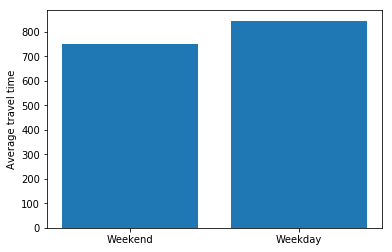

In [32]:
plt.bar([0,1],avg_weekday)
plt.xticks([0,1],('Weekend','Weekday'))
plt.ylabel('Average travel time')
plt.show()

We don't see much difference in average travel time given the time of the week or of the year so we might as well include all of these features to the prediction

In [34]:
avg_hour=features.groupby('day_hour').mean()['travel_time']

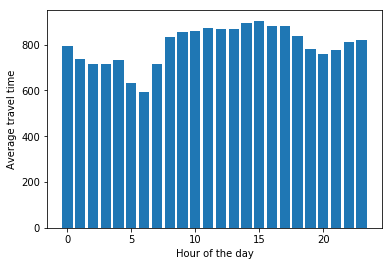

In [36]:
plt.bar(range(0,24),avg_hour)
plt.ylabel('Average travel time')
plt.xlabel('Hour of the day')
plt.show()

We see much higher travel time between 7am and 11pm than at night so we might narrow our predictions to that time of day or create a new feature : rush hour VS non rush hour

#### Trips over time

In [90]:
trips=features.groupby('date_of_year').count()['Unnamed: 0']
trips_test=features_test.groupby('pickup_datetime').count()['Unnamed: 0']

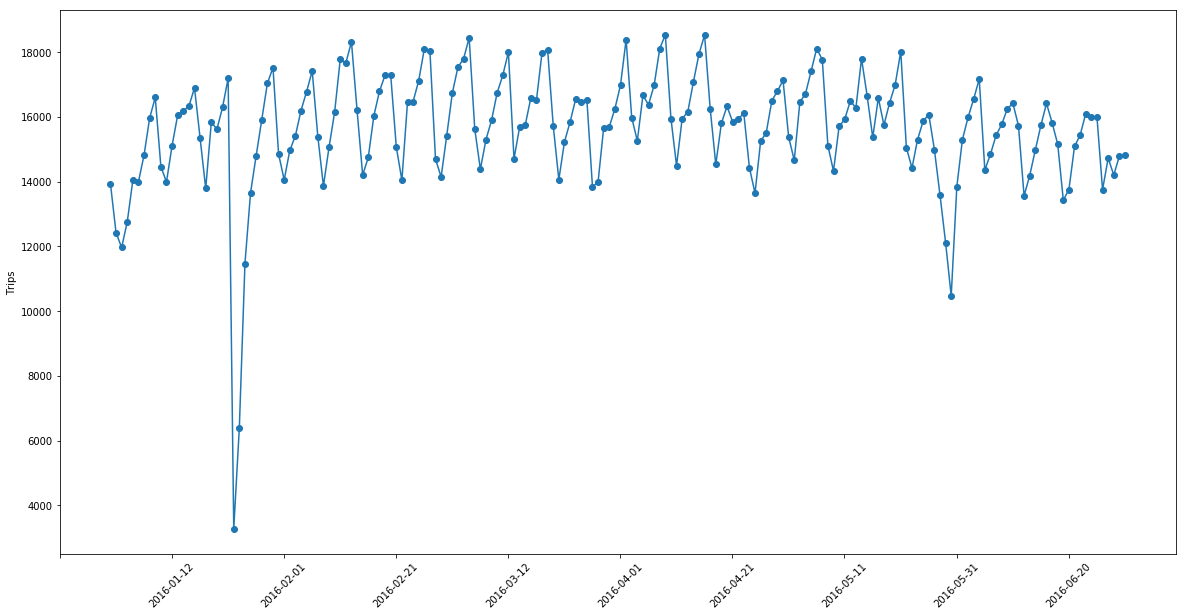

In [64]:
import numpy as np
fig,ax=plt.subplots(figsize=(20,10))
ax.plot(trips, 'o-')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 20))
plt.xticks(rotation=45)
plt.ylabel('Trips')
plt.show()

We see a big drop in January 2016 that might be because of the weather. We might then consider dropping this month for our model